### TextRank - Variations on simularity

In [1]:
# Make imports and defs avaiable from utils/nlp
%run utils/nlp.ipynb

### Load Subject Corpus

In [2]:
# Run utils/text to enable load_text
%run utils/text.ipynb

In [18]:
# Load text 1 - 3, where 1 = Galileo, 2 = Mendel, 3 = Order
df=load_text(3)

text = df['text'][0]
headline = df['headline'][0]

print(text)

You have seen earlier that categories like species, genus and families are based on a number of similar characters. Generally, order and other higher taxonomic categories are identified based on the aggregates of characters. Order being a higher category, is the assemblage of families which exhibit a few similarcharacters. The similar characters are less in number as compared to different genera included in a family. Plant families like Convolvulaceae, Solanaceae are included in the order Polymoniales mainly based on the floral characters. The animal order, Carnivora, includes families like Felidae and Canidae.


In [19]:
#!pip install summa
from summa.summarizer import summarize

In [44]:
RATIO = 0.4
SPLIT = True
SCORES = False

def text_rank_sum(text):
    # If score is True use rank_sentences (and split False)
    rank_sentences = summarize(text, ratio=RATIO, split=SPLIT, scores=SCORES)

    # Get a string if scores is False.
    final = ' '.join(rank_sentences)
    
    return final

In [38]:
rank = text_rank_sum(text)
print(rank)

You have seen earlier that categories like species, genus and families are based on a number of similar characters. Plant families like Convolvulaceae, Solanaceae are included in the order Polymoniales mainly based on the floral characters. The animal order, Carnivora, includes families like Felidae and Canidae.


In [7]:
from summa.keywords import keywords

In [8]:
key = keywords(text, ratio=0.1, split=True)
print(key)

['galileo', 'science', 'observations', 'bodies', 'body', 'falling', 'fall', 'meant', 'theory', 'theories']


### ROUGE Test on Newsroom set

In [22]:
# Make utils/rouge and utils/heatmap available
%run utils/rouge.ipynb

In [23]:
# load 3 texts from newsroom data set named from their index
text_7, summary_7 = load_news(7)
text_70, summary_70 = load_news(70)
text_150, summary_150 = load_news(150)

In [45]:
textrank_comp_7 = text_rank_sum(text_7)
textrank_comp_70 = text_rank_sum(text_70)
textrank_comp_150 = text_rank_sum(text_150)

<Figure size 432x288 with 0 Axes>

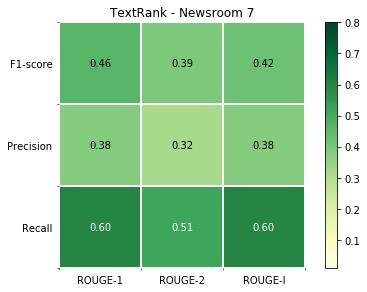

In [46]:
rouge_heatmap(textrank_comp_7, summary_7)

plt.title('TextRank - Newsroom 7')
plt.show()

<Figure size 432x288 with 0 Axes>

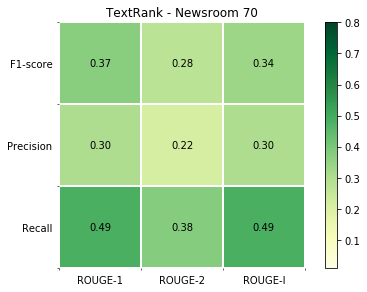

In [47]:
rouge_heatmap(textrank_comp_70, summary_70)

plt.title('TextRank - Newsroom 70')
plt.show()

<Figure size 432x288 with 0 Axes>

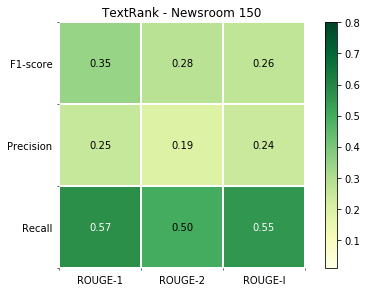

In [48]:
rouge_heatmap(textrank_comp_150, summary_150)

plt.title('TextRank - Newsroom 150')
plt.show()